# หน่วยที่ 7 การเรียนรู้ของเครื่องแบบไม่มีผุู้สอน

###1. การจัดกลุ่มแบบเค-มีนส์ (K-Means clustering)

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)
'''วิธีการตั้งค่าการสุ่มเริ่มต้น (seed) สำหรับการสร้างเลขสุ่มใน numpy ครับ
ซึ่งมีประโยชน์ในการทำให้ผลลัพธ์การสุ่มเป็นไปในลักษณะเดียวกันทุกครั้งที่รันโค้ด
ทำให้สามารถทำการทดสอบและวิเคราะห์ได้ง่ายขึ้น เนื่องจากผลลัพธ์การสุ่มจะไม่เปลี่ยนแปลง'''

cluster1 = np.random.normal(loc=[2,2], scale=[0.2,0.2], size=(10,2))
'''
การสร้าง array สองมิติในภาษา Python โดยใช้ numpy (np). เรามาอธิบายทีละส่วนกันครับ:

np.random.normal(loc=[2,2], scale=[0.2,0.2], size=(10,2)):
ฟังก์ชัน np.random.normal ของ numpy จะสร้าง array ของค่าที่สุ่มจากการแจกแจงแบบปกติ (normal distribution).
loc=[2,2] กำหนดค่าเฉลี่ยของการแจกแจงเป็น [2,2] ซึ่งหมายความว่าจุดข้อมูลที่สร้างขึ้นมาจะมีการกระจุกตัวอยู่รอบจุดที่ (2, 2).
scale=[0.2,0.2] กำหนดส่วนเบี่ยงเบนมาตรฐานของการแจกแจงเป็น [0.2, 0.2] ซึ่งหมายความว่าการกระจายตัวของจุดข้อมูล
จะมีความแคบหรือกว้างตามค่าที่กำหนด.
size=(10,2) กำหนดขนาดของ array ที่สร้างขึ้นมาให้เป็น 10x2 ซึ่งหมายความว่าเราจะได้จุดข้อมูล 10 จุดในแต่ละมิติ (2 มิติ).
เมื่อใช้โค้ดนี้จะได้ผลลัพธ์ที่เป็น array ขนาด 10x2 ของจุดข้อมูลที่กระจายตัวรอบ ๆ จุด (2, 2) โดยมีการกระจายตัวตามค่าที่กำหนด.
'''
cluster2 = np.random.normal(loc=[3,3], scale=[0.3,0.3], size=(10,2))
cluster3 = np.random.normal(loc=[4,2], scale=[0.4,0.4], size=(10,2))
dataset = np.vstack((cluster1, cluster2, cluster3)) #นำเลขสุ่มทั้งสามมารวมเป็นชุดข้อมูลเดียวกันเก็บไว้ในตัวแปร dataset

df = pd.DataFrame(dataset, columns=['x','y']) #สร้างดาต้าเฟรมเพื่อแสดงข้อมุลออกมาดู
print(df)

           x         y
0   2.352810  2.080031
1   2.195748  2.448179
2   2.373512  1.804544
3   2.190018  1.969729
4   1.979356  2.082120
5   2.028809  2.290855
6   2.152208  2.024335
7   2.088773  2.066735
8   2.298816  1.958968
9   2.062614  1.829181
10  2.234103  3.196086
11  3.259331  2.777350
12  3.680926  2.563690
13  3.013728  2.943845
14  3.459834  3.440808
15  3.046484  3.113449
16  2.733664  2.405761
17  2.895626  3.046905
18  3.369087  3.360714
19  2.883802  2.909309
20  3.580579  1.431993
21  3.317492  2.780310
22  3.796139  1.824770
23  3.498882  2.310996
24  3.354441  1.914904
25  3.641813  2.154761
26  3.795678  1.527747
27  3.988727  2.171333
28  4.026607  2.120989
29  3.746271  1.854904


###การจัดกลุ่มแบบเคมีนส์

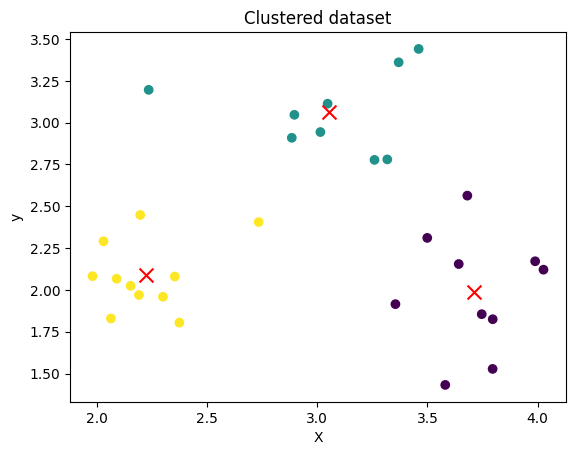

Cluseter Labels :
[2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 0 0 0 0 0]
Centroids :
[[3.71100635 1.98760866]
 [3.05327632 3.06319725]
 [2.22330237 2.08731251]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(dataset, k, max_iter=100):
  np.random.seed(42)
  centroids = dataset[np.random.choice(range(len(dataset)), size=k, replace=False)]
  '''
np.random.choice(range(len(dataset)), size=k, replace=False):

np.random.choice ใช้สำหรับการสุ่มเลือกค่า k ค่าจากลำดับที่สร้างขึ้น (range(len(dataset))).
size=k: ระบุจำนวนค่าที่จะสุ่มเลือก ซึ่งในกรณีนี้คือจำนวนศูนย์กลาง (k).
replace=False: ระบุว่าการสุ่มเลือกต้องไม่ซ้ำกัน (เลือกแล้วไม่คืนค่า).
  '''
  for _ in range(max_iter): # วนลูปการทำซ้ำสูงสุด max_iter ครั้ง
    distances = np.linalg.norm(dataset[:, np.newaxis] - centroids, axis=2) #ใช้ในการคำนวณระยะห่างระหว่างจุดข้อมูล
                                              #ใน dataset กับศูนย์กลางแต่ละศูนย์กลางที่ได้จากการจัดกลุ่ม K-means
                                              #ในแต่ละรอบของการทำซ้ำ (iteration) ของอัลกอริธึม K-means.
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([np.mean(dataset[labels == i], axis=0) for i in range(k)])
    if np.allclose(centroids, new_centroids):
      break
    centroids = new_centroids
  return labels, centroids

k = 3
labels, centroids = kmeans(dataset, k)
plt.scatter(dataset[:,0], dataset[:,1], c =labels,cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x',s=100)
plt.title('Clustered dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print('Cluseter Labels :')
print(labels)
print('Centroids :')
print(centroids)

การนำจุดศูนย์กลางของกลุ่มที่ได้จากการเรียนรู้ไปใช้งานเพื่อทำนายกลุ่มตัวอย่างใหม่

In [ ]:
import numpy as np

def assign_clusters(data, centroids):
  distances = np.linalg.norm(data[:,np.newaxis]-centroids, axis=2)
  labels = np.argmin(distances, axis=1)
  return labels

centroids = np.array([[3.9678933,2.01074837],
                     [1.96305519,1.96842539],
                      [2.94975542,2.89065951]])
''' กำหนดจุดศูนย์กลางของ 3 กลุ่ม โดยได้จากผลลัพธ์การเรียนรู้ของโค้ดข้างบน '''
new_data = np.array([[2.49816048,3.85214982],
                     [3.97297577,2.78865883],
                     [1.23552526,3.97275352],
                     [1.23376467,3.58922735]])
''' ทดลองกลุ่มตัวอย่างใหม่ 4 หน่วยตัวอย่าง '''

new_labels = assign_clusters(new_data, centroids) #เรียกใช้ฟังก์ชั่น assign_clusters เพื่อทำนายกลุ่มของหน่วยใหม่

print('New Data Points and Assigned Cluster Labels:')
for i in range(len(new_data)):
  print('Data Point: ',new_data[i])
  print('Cluster Label : ',new_labels[i])
  print()

New Data Points and Assigned Cluster Labels:
Data Point:  [2.49816048 3.85214982]
Cluster Label :  2

Data Point:  [3.97297577 2.78865883]
Cluster Label :  0

Data Point:  [1.23552526 3.97275352]
Cluster Label :  2

Data Point:  [1.23376467 3.58922735]
Cluster Label :  1



การจัดกลุ่มแบบเคมีนส์ด้วยไลบราลี Scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


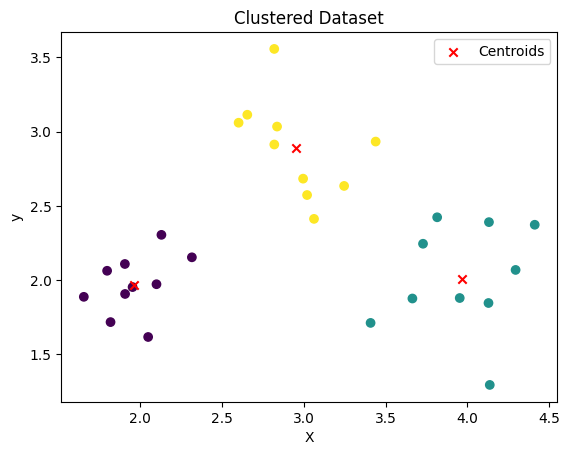

Cluster Labels :
[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]

Centroids :
[[1.96305519 1.96842539]
 [3.96789933 2.01074837]
 [2.94975542 2.89065951]]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(42)
cluster1 = np.random.normal(loc=[2,2], scale=[0.2,0.2], size=(10,2))
cluster2 = np.random.normal(loc= [3,3], scale=[0.3,0.3], size=(10,2))
cluster3 = np.random.normal(loc=[4,2], scale=[0.4,0.4], size=(10,2))
dataset = np.vstack( (cluster1, cluster2, cluster3) )

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset)

labels = kmeans.labels_ #กำหนดค่าของตัวแปรในที่นี้ labels_ จึงเป็นผลลัพธ์ของการคลัสเตอร์ของจุดข้อมูลทั้งหมดใน X
                        #โดยมีจำนวน cluster ที่กำหนดไว้ใน n_clusters ของ KMeans object ที่สร้างขึ้น.
centroids = kmeans.cluster_centers_

plt.scatter(dataset[:,0], dataset[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', label='Centroids')
plt.title('Clustered Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print('Cluster Labels :')
print(labels)
print('\nCentroids :')
print(centroids)

การตรวจสอบค่า k ที่เหมาะสมในการแบ่งกลุ่มแบบเคมีนส์ โดยการใช้วิธีเอลโบว์ elbow มาประกอบการตัดสินใจเลือกค่า k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

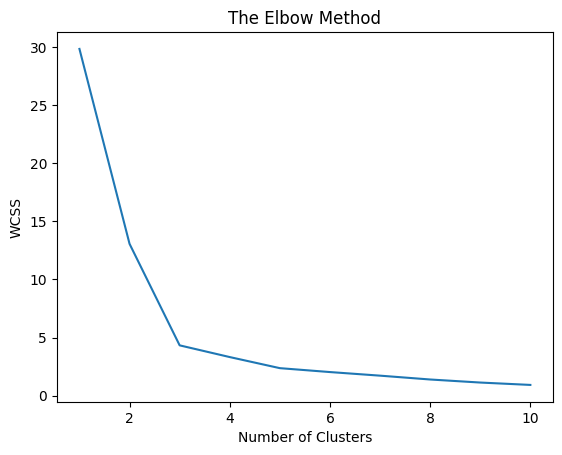

'\n จากผลของภาพจะพบว่า การเพิ่มจำนวนกลุ่มตั้งแต่ 4 กลุ่มขึ้นไปทำให้ความหนาแน่นภายในกลุ่มเพ่ิมขึ้นไม่คุ้มค่ากับการบริหารจัดการจำนวนกลุ่ม\n ที่มากขึ้น ดังนั้น จำนวนกลุ่มที่เหมาะสมสุดคือ 3 ค่า k  ดีสุดจากบริเวณกราฟหักมุมมากทีุ่สด'

In [ ]:
from sklearn.cluster import kmeans_plusplus

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k , random_state=42)
  kmeans.fit(dataset)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
'''
 จากผลของภาพจะพบว่า การเพิ่มจำนวนกลุ่มตั้งแต่ 4 กลุ่มขึ้นไปทำให้ความหนาแน่นภายในกลุ่มเพ่ิมขึ้นไม่คุ้มค่ากับการบริหารจัดการจำนวนกลุ่ม
 ที่มากขึ้น ดังนั้น จำนวนกลุ่มที่เหมาะสมสุดคือ 3 ค่า k  ดีสุดจากบริเวณกราฟหักมุมมากทีุ่สด'''

###2. การจัดกลุ่มแบบลำดับชั้น (hierarchical clustering)

 ช่วยแก้ปัญหาการจัดกลุ่มแบบเคมีนส์ที่ต้องระบุค่า k ในขั้นตอนแรกเสมอ

 โดยการสร้างแผนภาพต้นไม้ที่เรียกว่า dendogram  ที่เป็นภาพต้นไม้ที่มีชั้นล่างสุดเป็นหน่วยตัวอย่างแต่ละหน่วย และสร้างแขนงของต้นไม้แสดงการจับกลุ่มของหน่วยตัวอย่าง โดยหน่วยตัวอย่างที่อยุ่ใกล้กันมากที่สุดจะถูกจับกลุ่มก่อน

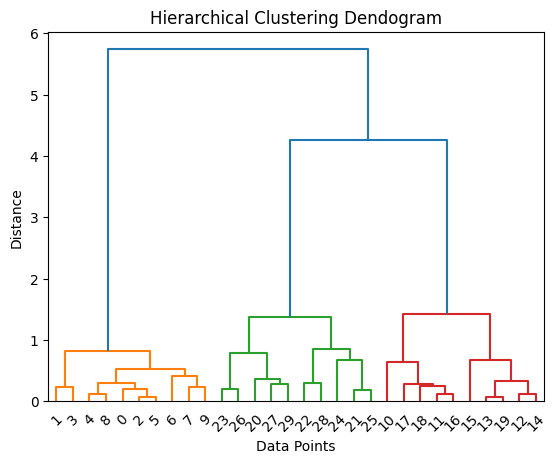

Cluster Labels :
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage,cut_tree

np.random.seed(42)
cluster1 = np.random.normal(loc=[2,2], scale=[0.2,0.2], size=(10,2))
cluster2 = np.random.normal(loc= [3,3], scale=[0.3,0.3], size=(10,2))
cluster3 = np.random.normal(loc=[4,2], scale=[0.4,0.4], size=(10,2))
dataset = np.vstack( (cluster1, cluster2, cluster3) )
dataset = np.array(dataset,dtype=np.float64)
Z = linkage(dataset,method='ward') #คำนวณระยะห่างระหว่างคลัสเตอร์พิจารณาการเพ่ิ่มขึ้นของ wcss(within cluster sum of squares)
dendrogram(Z)
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

threshold = 2
labels = cut_tree(Z,height=threshold).flatten()
print('Cluster Labels :')
print(labels)



###3. การจัดกลุ่มแบบ DBscan (Density Based Spatial Culstering of Application with Noise)

โดยพิจารณาความหนาแน่นของกลุ่มเป็นพื้นฐา่น มีความสามารถจัดกลุ่มการกระจายตัวเป็นรูปร่างได้ สามารถแยกกลุ่มที่รวมตัวกันเป็นวงแหวนออกจากกลุ่มที่กระจุกตัวอยุ่ตรงกลางได้ดีกว่า อัลกอริทึมแบบ เคมีนส์

[[-1.04942573e+00  8.44426315e-02]
 [ 9.22817545e-01  4.57488507e-01]
 [ 6.56786593e-01  6.99596694e-01]
 [ 1.18894020e+00 -3.86528073e-01]
 [ 2.89264549e-01 -1.37744892e-01]
 [ 2.51685082e-01  1.81006054e-01]
 [-6.68120991e-01  8.22265447e-01]
 [ 1.55626644e+00 -2.03445580e-01]
 [ 1.87213538e+00 -1.25335230e-01]
 [ 1.43229273e-01  9.53267512e-01]
 [-4.35091327e-01  7.43738050e-01]
 [ 1.91161702e+00 -1.05146485e-01]
 [ 1.53432590e+00 -3.97547101e-01]
 [-8.24879535e-01  5.29607749e-01]
 [ 1.88043395e+00  1.54681644e-01]
 [ 1.87043050e+00 -9.01427936e-02]
 [-6.84180156e-02  1.23271872e+00]
 [ 1.04680086e+00 -5.17441448e-01]
 [-1.00198756e+00  6.32750117e-01]
 [-4.23980382e-01  7.45855239e-01]
 [ 3.38030046e-01 -6.83719318e-02]
 [ 8.96478204e-01  5.70936879e-01]
 [ 9.69901385e-01 -6.20552828e-01]
 [-8.76993958e-01  3.21761811e-01]
 [-3.98820968e-01  7.86003637e-01]
 [-4.02185906e-01  8.31958013e-01]
 [-8.11837713e-01  5.85065474e-01]
 [-4.84776843e-01  9.43778988e-01]
 [ 2.11761003e-01 -1

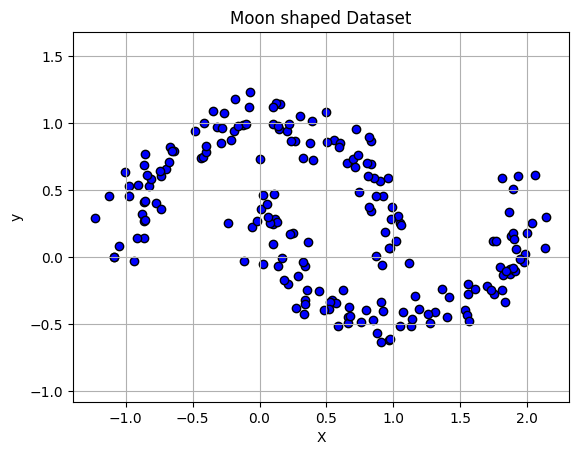

In [ ]:
from sklearn.datasets import make_moons

X,_ = make_moons(n_samples=200,noise=0.1,random_state=42)
print(X)
plt.scatter(X[:,0],X[:,1],c='blue',edgecolors='k') # edgecolors = k กำหนดขอบของจุดเป็นสีดำ
plt.xlabel('X')
plt.ylabel('y')
plt.title('Moon shaped Dataset')
plt.grid(True)
plt.axis('equal')
plt.show()

การเปรียบเทียบผลลัพธ์การจัดกลุ่มแบบเคมีนส์ กับ การจัดกลุ่มแบบดีบีสแกน

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

kmeans = KMeans(n_clusters=2, random_state=42) #จัดกลุ่มตัวอย่างเคมีนส์ k=2
kmeans_label = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.22,min_samples=5) #eps คือ รัศมีรอบ core point
dbscan_label = dbscan.fit_predict(X)

df= pd.DataFrame({'K-means' : kmeans_label, 'DBSCAN' : dbscan_label})
pd.set_option('display.max_rows',None)
print('Comparison of K-means and DBSCAN')
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Comparison of K-means and DBSCAN
     K-means  DBSCAN
0          0       0
1          1       0
2          0       0
3          1       1
4          0       1
5          0       1
6          0       0
7          1       1
8          1       1
9          0       0
10         0       0
11         1       1
12         1       1
13         0       0
14         1       1
15         1       1
16         0       0
17         1       1
18         0       0
19         0       0
20         0       1
21         1       0
22         1       1
23         0       0
24         0       0
25         0       0
26         0       0
27         0       0
28         0       1
29         1       1
30         1       0
31         1       0
32         0       0
33         0       0
34         1       1
35         0       1
36         1       1
37         1       1
38         1       1
39         0       0
40         0       0
41         1       1
42         0       0
43         1       0
44         0       1
4

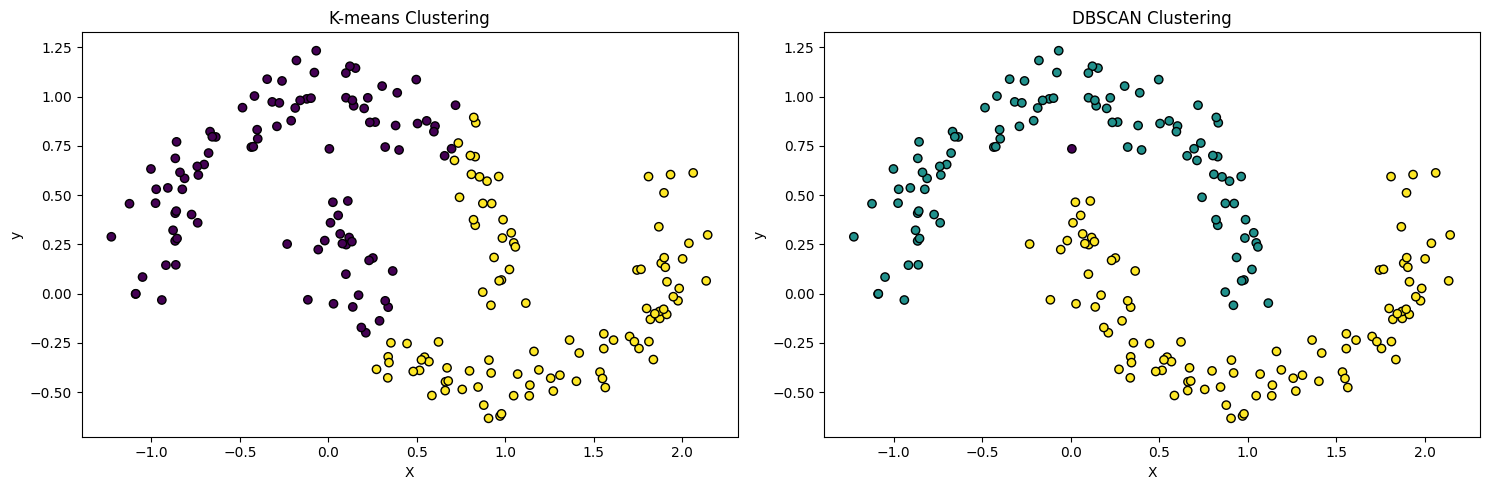

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=kmeans_label,cmap='viridis',edgecolors='k')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=dbscan_label,cmap='viridis',edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout() #ปรับขนาดและจัดวางองค์ประกอบต่างๆ ในกราฟหรือภาพให้อยู่ในตำแหน่งที่เหมาะสม และไม่ทับซ้อนกัน
plt.show()

เคมีนส์ มีแนวคิดจากการกำหนดจุดศูนย์กลางของกลุ่มแบบสุ่ม แล้วปรับจุดศูนย์กลางไปเรื่อยจนกว่าจะไม่เปลี่ยนแปลง ไม่เหมาะกับข้อมูลที่เป็นกลุ่มแบบเรียงตัวเป็นเส้นหรือมีรูปร่างที่ไม่ใช่กลุ่มที่กระจุกตัวเป็นวงกลม การจัดกลุ่มแบบดีบีสแกนสามารถแก้ไขปัญหานี้ได้

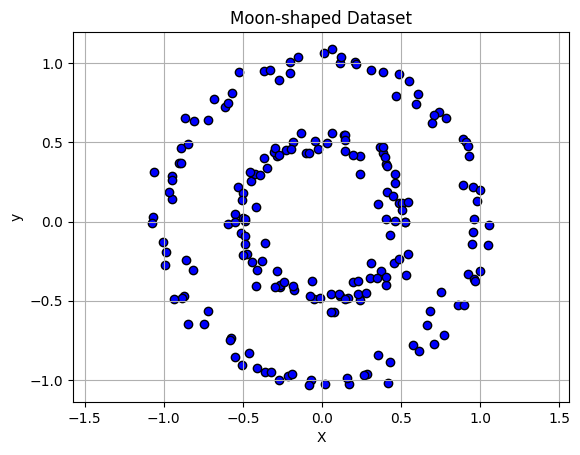

In [ ]:
#การสร้างชุดข้อมูลเรียงตัวเป็นรูปวงแหวน
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
X,_ = make_circles(n_samples=200,noise=0.05,factor=0.5,random_state=42)

plt.scatter(X[:,0],X[:,1],c='blue',edgecolors='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Moon-shaped Dataset')
plt.grid(True)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


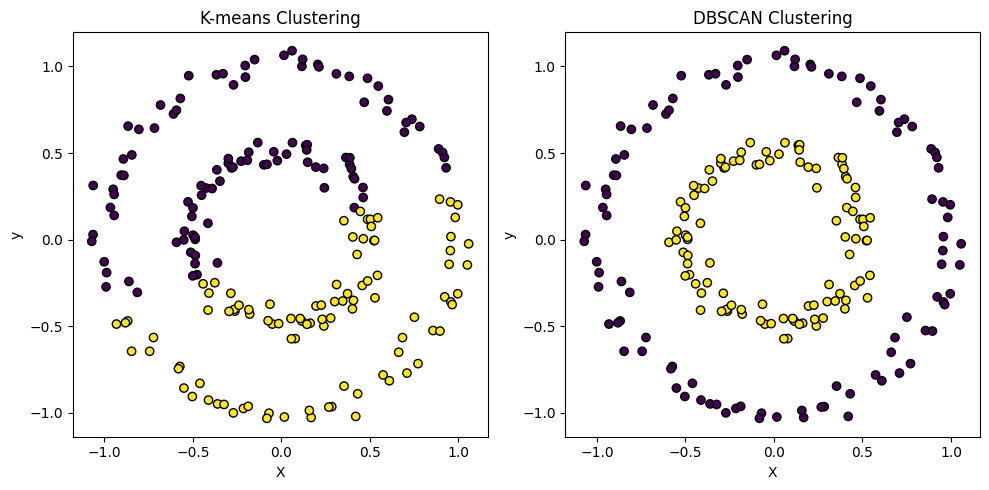

In [ ]:
#การเปรียบเทียบแบบดีบีสแกนกับ เคมีนส์ ที่มีข้อมูลเรียงตัวเป็นรูปวงแหวน
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.22,min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

fig,axs = plt.subplots(1,2,figsize=(10,5)) #แสดงกราฟหลายกราฟในหน้าเดียวกัน
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# กฎการหาความสัมพันธ์ระหว่างข้อมูลและระบบแนะนำ

###1. อัลกอริทีม apriori

 เป็นการค้นหาความสัมพันธ์ระหว่างข้อมูลของการทำเหมืองข้อมู่ลที่ใช้สำหรับหาความสัมพันธ์หรือ รูปแบบการเชื่อมโยงที่แอบแฝงอยุ่ในชุดข้อมูล เหมาะสำหรับการวิเคราะห์ข้อมูล การทำธุรกรรมรายการจำนวนมากที่มีความเชื่อมโยงแอบแฝงอยู่

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
#สร้างอาเรย์สองมิติแต่ละแถวคือ แต่ละ transaction หรือรายการซื้อผลไม้แต่ละครั้ง
transaction = [
    ['apple','banana','orange'],
    ['banana','orange','grape'],
    ['apple','banana','grape'],
    ['apple','orange'],
    ['banana','grape'],
    ['apple','banana','grape','kiwi'],
    ['orange','grape','kiwi'],
    ['apple','kiwi'],
    ['apple','orange','kiwi'],
    ['banana','kiwi','mango'],
    ['apple','banana','orange','grape','kiwi']
]

te = TransactionEncoder()  #สร้างตัวเข้ารหัส TransactionEncoder
te_ary = te.fit(transaction).transform(transaction) # ฝึกตัวเข้ารหัสกับข้อมูลธุรกรรมและแปลงข้อมูลเป็นรูปแบบที่เหมาะสม
df = pd.DataFrame(te_ary,columns=te.columns_) # แปลงข้อมูลที่เข้ารหัสแล้วเป็น DataFrame
          #ข้อมูลที่ถูกแปลง (transaction_array) จะอยู่ในรูปแบบ numpy array ที่ประกอบด้วยค่า True/False
          #ซึ่งบ่งบอกว่ารายการนั้น ๆ อยู่ในธุรกรรมหรือไม่. โดยตั้งชื่อคอลัมน์ตามรายการในธุรกรรมดั้งเดิม (te.columns_).
print(df)



    apple  banana  grape   kiwi  mango  orange
0    True    True  False  False  False    True
1   False    True   True  False  False    True
2    True    True   True  False  False   False
3    True   False  False  False  False    True
4   False    True   True  False  False   False
5    True    True   True   True  False   False
6   False   False   True   True  False    True
7    True   False  False   True  False   False
8    True   False  False   True  False    True
9   False    True  False   True   True   False
10   True    True   True   True  False    True


การสร้างกฎความสัมพันธ์ฺระหว่างข้อมูล

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules

frequent_itemsets = apriori(df,min_support=0.2, use_colnames=True) #ใช้ในการค้นหากลุ่มรายการ (itemsets)
                                  #ที่เกิดขึ้นบ่อยในชุดข้อมูลธุรกรรม โดยใช้ไลบรารี mlxtend ซึ่งมีการติดตั้งอัลกอริธึม Apriori.
print('frequent itemsets :')
print(frequent_itemsets)

rules = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.6)
'''
ใช้ฟังก์ชัน association_rules เพื่อสร้างกฎความสัมพันธ์จากกลุ่มรายการที่เกิดขึ้นบ่อย:
frequent_itemsets คือ DataFrame ที่ประกอบด้วยกลุ่มรายการที่เกิดขึ้นบ่อย.
metric='confidence' กำหนดให้ใช้ค่าความเชื่อมั่น (confidence) เป็นตัววัด.
min_threshold=0.6 กำหนดค่าขั้นต่ำของความเชื่อมั่นที่ต้องการ (เช่น กฎที่มีความเชื่อมั่นอย่างน้อย 60%).

antecedents คือรายการในส่วนซ้ายของกฎ (ก่อนลูกศร).
consequents คือรายการในส่วนขวาของกฎ (หลังลูกศร).
antecedent support คือความถี่สนับสนุนของรายการในส่วนซ้าย.
consequent support คือความถี่สนับสนุนของรายการในส่วนขวา.
support คือความถี่สนับสนุนของทั้งกฎ.
confidence คือค่าความเชื่อมั่นของกฎ.
lift คือค่าที่บอกว่าเกิดกฎนี้บ่อยแค่ไหนเมื่อเทียบกับการเกิดขึ้นโดยบังเอิญ.
leverage และ conviction เป็นค่าที่ใช้ในการวัดความสัมพันธ์อื่นๆ.
'''

print('\nAssociation Rules :')
print(rules)

frequent itemsets :
    support                 itemsets
0       0.6                  (apple)
1       0.8                 (banana)
2       0.6                  (grape)
3       0.6                 (orange)
4       0.4          (banana, apple)
5       0.2           (grape, apple)
6       0.4          (orange, apple)
7       0.6          (grape, banana)
8       0.4         (orange, banana)
9       0.2          (orange, grape)
10      0.2   (grape, banana, apple)
11      0.2  (orange, banana, apple)
12      0.2  (orange, grape, banana)

Association Rules :
       antecedents consequents  antecedent support  consequent support  \
0          (apple)    (banana)                 0.6                 0.8   
1         (orange)     (apple)                 0.6                 0.6   
2          (apple)    (orange)                 0.6                 0.6   
3          (grape)    (banana)                 0.6                 0.8   
4         (banana)     (grape)                 0.8                 0.6 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###2. อัลกอริทีม FP-growth (Freequent Pattern Growth)

เป็นอัลการิทีมทำเหมืองข้อมูลที่ใช้ค้นหาความสัมพันธ์ระหว่างข้อมูลขนาดใหญ่ สามารถจัดการข้อมูลขนาดใหญ่ได้มากกว่า apriori โดยใช้โครงสร้างต้นไม้แบบ FP-tree


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

transactions = [
    ['banana','apple', 'orange'],
    ['banana', 'orange', 'grape'],
    ['banana', 'apple', 'grape'],
    ['apple', 'orange'],
    ['banana', 'grape']
] #กำหนดชุดให้มี 5 transaction

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary,columns=te.columns_)

frequent_itensets = fpgrowth(df,min_support=0.2,use_colnames=True)
association_rules = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.6)

print(association_rules)
'''
จะได้ว่า กฎความสัมพันธ์ระหว่างข้อมูลที่เป็นผลลัพธ์มีอยู่ 8 กฎ คือ
apple->banana ด้วยความเชื่อมั่น 0.666667
orange->apple
apple->orange
grape->banana
banana->grape
orange->banana
grape,apple->banana
orange,grape->banana
'''

       antecedents consequents  antecedent support  consequent support  \
0          (apple)    (banana)                 0.6                 0.8   
1         (orange)     (apple)                 0.6                 0.6   
2          (apple)    (orange)                 0.6                 0.6   
3          (grape)    (banana)                 0.6                 0.8   
4         (banana)     (grape)                 0.8                 0.6   
5         (orange)    (banana)                 0.6                 0.8   
6   (grape, apple)    (banana)                 0.2                 0.8   
7  (orange, grape)    (banana)                 0.2                 0.8   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.4    0.666667  0.833333     -0.08         0.6      -0.333333  
1      0.4    0.666667  1.111111      0.04         1.2       0.250000  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.6    1.000000  1.250000      0.12   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


กรณีศึกษาการสร้างระบบแนะนำจากกฎความสัมพันธ์ระหว่างข้อมูล

In [ ]:
import pandas as pd
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#สร้าง transaction  ด้วยการควบรวม key เดียวกันจากทั้งสองไฟล์

merged_data = pd.merge(movies,ratings,on='movieId')
dataset = merged_data[['userId','title']] #สร้างดาต้าเฟรมใหม่โดยตัดเอาเฉพาะคอลัมน์ userId,title มาใช้เท่านั้น

dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,title
0,1,Toy Story (1995)
1,5,Toy Story (1995)
2,7,Toy Story (1995)
3,15,Toy Story (1995)
4,17,Toy Story (1995)


เนื่องจากมีข้อมูลซ้ำกันหลายแถว คือ มี  useId คนเดียวแต่ดูหนังหลายเรื่อง ต้องแปลงข้อมูลให้อยู่ในรูปแบบของ transaction คือ ข้อมูล 1 แถวเป็นของ userId

In [ ]:
grouped_data = dataset.groupby('userId')['title'].apply(list).reset_index(name='movies_list')
'''
โค้ดนี้ใช้ pandas library ใน Python เพื่อจัดกลุ่มข้อมูลใน dataset ตาม userId และดึงรายการชื่อภาพยนตร์สำหรับแต่ละผู้ใช้

ขั้นตอนการทำงาน:
dataset.groupby('userId'): แบ่งกลุ่มข้อมูลใน dataset ตามคอลัมน์ userId
['title']: เลือกคอลัมน์ title จากแต่ละกลุ่ม
.apply(list): แปลงข้อมูลในคอลัมน์ title เป็นรายการสำหรับแต่ละกลุ่ม
.reset_index(name='movies_list'): เปลี่ยน userId กลับเป็นคอลัมน์ปกติ และตั้งชื่อคอลัมน์รายการชื่อภาพยนตร์ใหม่เป็น movies_list
'''
transactions = grouped_data['movies_list'].tolist()
'''
โค้ดนี้ใช้ Pandas library ใน Python เพื่อแยกคอลัมน์ movies_list ออกจาก grouped_data DataFrame และแปลงคอลัมน์นั้นเป็นรายการ Python ทั่วไป

ขั้นตอนการทำงาน:
grouped_data['movies_list']: เลือกคอลัมน์ movies_list จาก grouped_data DataFrame
**.tolist(): แปลงข้อมูลในคอลัมน์ movies_list เป็นรายการ Python
'''

grouped_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movies_list
0,1,"[Toy Story (1995), Grumpier Old Men (1995), He..."
1,2,"[Shawshank Redemption, The (1994), Tommy Boy (..."
2,3,"[Dangerous Minds (1995), Schindler's List (199..."
3,4,"[Get Shorty (1995), Twelve Monkeys (a.k.a. 12 ..."
4,5,"[Toy Story (1995), Get Shorty (1995), Babe (19..."


แปลงข้อมูลให้อยู่ในรูปของฟีเจอร์เวกเตอร์ด้วยคำสั่ง TransactionEncoder

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary,columns=te.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


การสร้างกฎความสัมพันธ์ระหว่างข้อมูลด้วยอัลกอริทึม apriori

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules

frequent_itemsets = apriori(df,min_support=0.1,use_colnames=True)
association_rules =association_rules(frequent_itemsets,metric='confidence',min_threshold=0.75)
association_rules[['antecedents','consequents','confidence']] #เลือกพิมพ์เฉพาะคอลัมน์ที่เกี่ยวกับความสัมพันธ์ออกมาดู

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
